<a href="https://colab.research.google.com/github/ChelfinSetiawan/Pemrogaman_Python/blob/main/Tugas_Minggu_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chelfin Setiawan
#1101194257
#TT-43-07 (G11)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def ploss(fc,ht,d,area,hg) :
  #nilai c1 & c2
  if fc in range(150,1500):
        c1 = 69.55
        c2 = 26.16
  elif fc in range(1501,2001):
    c1 = 46.3
    c2 = 33.9
  
  #nilai cm
  if area == "urban":
    cm = 0
  elif area == "suburb":
    cm = -2*((np.log10((fc/28)**2))-5.4)
  elif area == "open":
    cm = -4.78*(np.log10(fc)) + (18.33*np.log10(fc)) - 40.94

  ahg = (1.1*np.log10(fc)-0.7)*hg-(1.56*np.log10(fc)-1.8)
  Lp = c1+(c2*np.log10(fc))-(13.83*np.log(ht))-ahg+((44.9-6.55*np.log10(ht))*np.log10(d))-cm
  return Lp

f = 1800 #Hz
hTower = 80 #m
hUser = 1.5 #m
dMin = 300 #m
dMax = 1000 #m
N = 200
d = np.random.randint(dMin,dMax,N)

LpUrban = ploss(f,hTower,d,"urban",hUser)
LpSuburb = ploss(f,hTower,d,"suburb",hUser)
LpOpen = ploss(f,hTower,d,"open",hUser)

d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburb_sort=LpSuburb[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

def Preceive(Ptx,PL,Gtx,Grx) :
  Prx = Ptx - PL + Gtx + Grx
  return Prx


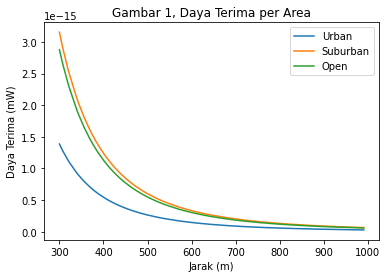

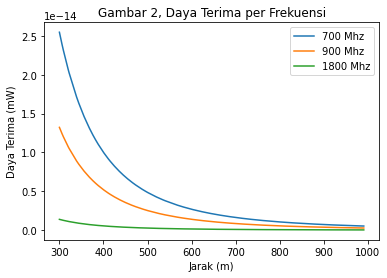

In [12]:
#Gambar 1, Daya Terima per Area (Prx)
NtL = lambda x: 10*np.log10(x)
DayaTx = NtL(30) #dBm
GainTx= 10 #dB
GainRx = 2 #dB

PrxUrban = Preceive(DayaTx,Urban_sort,GainTx,GainRx)
PrxSuburb = Preceive(DayaTx,Suburb_sort,GainTx,GainRx)
PrxOpen = Preceive(DayaTx,Open_sort,GainTx,GainRx)

LtN = lambda x: 10**(x/10)

PrxUrban1 = LtN(PrxUrban)
PrxSuburb1 = LtN(PrxSuburb)
PrxOpen1 = LtN(PrxOpen)
plt.figure()
plt.plot(d_sort,PrxUrban1,label = "Urban") #x,y
plt.plot(d_sort,PrxSuburb1,label = "Suburban")
plt.plot(d_sort,PrxOpen1,label = "Open")
plt.legend()
plt.title("Gambar 1, Daya Terima per Area")
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()


#Gambar 2, Daya Terima per Frekuensi (Prx)
LpU700 = ploss(700,hTower,d,"urban",hUser)
LpU900 = ploss(900,hTower,d,"urban",hUser)
LpU1800 = ploss(1800,hTower,d,"urban",hUser)

d_sort=d[np.argsort(d)]

U700_sort=LpU700[np.argsort(d)]
U900_sort=LpU900[np.argsort(d)]
U1800_sort=LpU1800[np.argsort(d)]

PrxU700 = Preceive(DayaTx,U700_sort,GainTx,GainRx)
PrxU900 = Preceive(DayaTx,U900_sort,GainTx,GainRx)
PrxU1800 = Preceive(DayaTx,U1800_sort,GainTx,GainRx)

LtN = lambda x: 10**(x/10)

PrxU7001 = LtN(PrxU700)
PrxU9001 = LtN(PrxU900)
PrxU18001 = LtN(PrxU1800)

plt.figure()
plt.plot(d_sort,PrxU7001, label = "700 Mhz") #x,y
plt.plot(d_sort,PrxU9001,label = "900 Mhz")
plt.plot(d_sort,PrxU18001, label = "1800 Mhz")
plt.legend()
plt.title("Gambar 2, Daya Terima per Frekuensi")
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

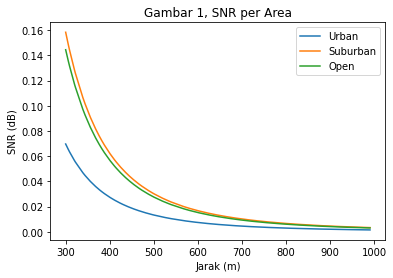

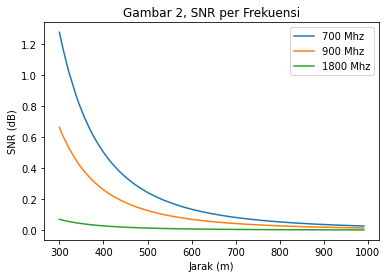

In [16]:
def ratio(Prx, Bw) :
  Noise = -174 + 10*np.log10(Bw)
  No = LtN(Noise)
  SNR = Prx/No
  return SNR

#Gambar 1, SNR per Area
bandwidth = 5000 #Hz
SNRUrban = ratio(PrxUrban1, bandwidth)
SNRSuburb = ratio(PrxSuburb1, bandwidth)
SNROpen = ratio(PrxOpen1, bandwidth)

plt.figure()
plt.plot(d_sort,SNRUrban, label = "Urban") #x,y
plt.plot(d_sort,SNRSuburb,label = "Suburban")
plt.plot(d_sort,SNROpen, label = "Open")
plt.legend()
plt.title("Gambar 1, SNR per Area")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()


#Gambar 2, SNR per Frekuensi
SNRU700 = ratio(PrxU7001, bandwidth)
SNRU900 = ratio(PrxU9001, bandwidth)
SNRU1800 = ratio(PrxU18001, bandwidth)

plt.figure()
plt.plot(d_sort,SNRU700, label = "700 Mhz") #x,y
plt.plot(d_sort,SNRU900,label = "900 Mhz")
plt.plot(d_sort,SNRU1800, label = "1800 Mhz")
plt.legend()
plt.title("Gambar 2, SNR per Frekuensi")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

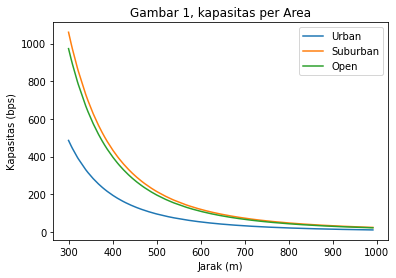

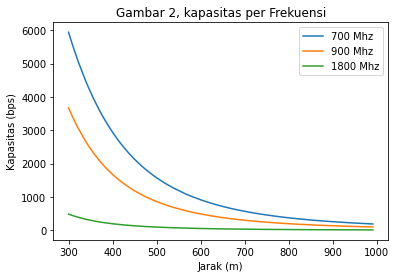

In [17]:
def kapasitas(SNR,BW) :
  cap = BW * np.log2(1+SNR)
  return cap

#Gambar 1, kapasitas per Area
CAPUrban = kapasitas(SNRUrban, bandwidth)
CAPSuburb = kapasitas(SNRSuburb, bandwidth)
CAPOpen = kapasitas(SNROpen, bandwidth)

plt.figure()
plt.plot(d_sort,CAPUrban, label = "Urban") #x,y
plt.plot(d_sort,CAPSuburb,label = "Suburban")
plt.plot(d_sort,CAPOpen, label = "Open")
plt.legend()
plt.title("Gambar 1, kapasitas per Area")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()


#Gambar 2, kapasitas per Frekuensi
CAPU700 = kapasitas(SNRU700, bandwidth)
CAPU900 = kapasitas(SNRU900, bandwidth)
CAPU1800 = kapasitas(SNRU1800, bandwidth)

plt.figure()
plt.plot(d_sort,CAPU700, label = "700 Mhz") #x,y
plt.plot(d_sort,CAPU900,label = "900 Mhz")
plt.plot(d_sort,CAPU1800, label = "1800 Mhz")
plt.legend()
plt.title("Gambar 2, kapasitas per Frekuensi")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()